In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# read in all our data
df = pd.read_csv("BiData (2).csv")

#df = pd.read_excel ('BiData-I.xlsx', sheet_name='BiData')

In [ ]:
df

,candidateID,citycode,cdi(city development index),gender,relevent_experience,enrollment status (higher education),highest qualification,specialization,experience (years),companysize (people),company_type,last_new_job (years since),training_hours(total in current job),looking to change jobs
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36.0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83.0,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52.0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,7323,city_103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19422,6512,city_65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19423,1799,city_67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19424,7763,city_21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df.dtypes

candidateID                               int64
citycode                                 object
cdi(city development index)             float64
gender                                   object
relevent_experience                      object
enrollment status (higher education)     object
highest qualification                    object
specialization                           object
experience (years)                       object
companysize (people)                     object
company_type                             object
last_new_job (years since)               object
training_hours(total in current job)    float64
looking to change jobs                    int64
dtype: object

In [ ]:
df.shape

(19426, 14)

In [ ]:
df.isnull().sum()

candidateID                                0
citycode                                   0
cdi(city development index)              268
gender                                  4776
relevent_experience                      268
enrollment status (higher education)     654
highest qualification                    728
specialization                          3081
experience (years)                       333
companysize (people)                    6206
company_type                            6408
last_new_job (years since)               691
training_hours(total in current job)     268
looking to change jobs                     0
dtype: int64

In [ ]:
df = df.rename(columns={"enrollment":"new_enrollment"})
df = df.rename(columns={"qualification":"new_qualification"})
df = df.rename(columns={"last_new_job (years since).1":"updated_last_new_job (years since)"})
df = df.rename(columns={"company_type.1":"new_company_type.1"})
df = df.rename(columns={"specialization.1":"new_specialization"})
df

,candidateID,citycode,cdi(city development index),gender,relevent_experience,enrollment status (higher education),highest qualification,specialization,experience (years),companysize (people),company_type,last_new_job (years since),training_hours(total in current job),looking to change jobs,experience_new,relevant_experience_new,new_enrollment,new_qualification,updated_last_new_job (years since),new_company_type.1,company_type_withlatestagestartup,new_specialization
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36.0,1,25,1,no_enrollment,Graduate,1,Startup,Growing Startup,STEM
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0,15,1,no_enrollment,Graduate,>4,Pvt Ltd,Pvt Ltd,STEM
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83.0,0,5,0,Full time course,Graduate,never,Startup,Growing Startup,STEM
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52.0,1,0,0,Part time course,Graduate,never,Pvt Ltd,Pvt Ltd,Business Degree
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8.0,0,25,1,no_enrollment,Masters,4,Funded Startup,Funded Startup,STEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,7323,city_103,0.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,0,Part time course,Diploma,<1,Startup,Growing Startup,STEM
19422,6512,city_65,0.802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,0,Part time course,Diploma,<1,Startup,Growing Startup,STEM
19423,1799,city_67,0.855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,0,Part time course,Diploma,<1,Startup,Growing Startup,STEM
19424,7763,city_21,0.624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,0,Part time course,Diploma,<1,Startup,Growing Startup,STEM


In [ ]:
df['citycode'].unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [ ]:
df['highest qualification'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [ ]:
df['new_qualification'].unique()

array(['Graduate', 'Masters', 'High School', 'Diploma', 'Phd',
       'Primary School'], dtype=object)

In [ ]:
df['experience (years)'].unique()

array(['>20', 15, 5, '<1', 11, 13, 7, 17, 2, 16, 1, 4, 10, 14, 18, 19, 12,
       3, 6, 9, 8, 20, nan], dtype=object)

In [ ]:
df['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience', nan],
      dtype=object)

In [ ]:
df['specialization'].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [ ]:
df['last_new_job (years since)'].unique()

array([1, '>4', 'never', 4, 3, 2, nan], dtype=object)

In [ ]:
df['companysize (people)'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999',
       datetime.datetime(1949, 10, 1, 0, 0), '100-500', '500-999'],
      dtype=object)

In [ ]:
df['enrollment status (higher education)'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [ ]:
df['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [ ]:
df['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [ ]:
df['gender'].fillna(value="No Value", inplace=True)
df

,candidateID,citycode,cdi(city development index),gender,relevent_experience,enrollment status (higher education),highest qualification,specialization,experience (years),companysize (people),company_type,last_new_job (years since),training_hours(total in current job),looking to change jobs,experience_new,relevant_experience_new,new_enrollment,new_qualification,updated_last_new_job (years since),new_company_type.1,company_type_withlatestagestartup,new_specialization
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36.0,1,25,1,no_enrollment,Graduate,1,Startup,Growing Startup,STEM
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0,15,1,no_enrollment,Graduate,>4,Pvt Ltd,Pvt Ltd,STEM
2,11561,city_21,0.624,No Value,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83.0,0,5,0,Full time course,Graduate,never,Startup,Growing Startup,STEM
3,33241,city_115,0.789,No Value,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52.0,1,0,0,Part time course,Graduate,never,Pvt Ltd,Pvt Ltd,Business Degree
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8.0,0,25,1,no_enrollment,Masters,4,Funded Startup,Funded Startup,STEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,7323,city_103,0.920,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,0,Part time course,Diploma,<1,Startup,Growing Startup,STEM
19422,6512,city_65,0.802,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,0,Part time course,Diploma,<1,Startup,Growing Startup,STEM
19423,1799,city_67,0.855,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,0,Part time course,Diploma,<1,Startup,Growing Startup,STEM
19424,7763,city_21,0.624,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,0,Part time course,Diploma,<1,Startup,Growing Startup,STEM


In [ ]:
df.to_excel(r'‪C:\Users\admin\Desktop\BiData-II.xlsx', index = False)

In [ ]:
df['updated_last_new_job (years since)'] =df['updated_last_new_job (years since)'].replace(['<1','never'],["No Value","0"])


In [ ]:
pearson_correlation=df.corr()
pearson_correlation

#There exists a moderate coorelation of -0.341665 between "Looking to change jobs" and "cdi (city development index)"

,candidateID,cdi(city development index),training_hours(total in current job),looking to change jobs,experience_new,relevant_experience_new
candidateID,1.000000,-0.037796,0.000998,0.019166,-0.028718,-0.016701
cdi(city development index),-0.037796,1.000000,0.001920,-0.335283,0.326627,0.293064
training_hours(total in current job),0.000998,0.001920,1.000000,-0.021577,-0.000282,0.000717
looking to change jobs,0.019166,-0.335283,-0.021577,1.000000,-0.171431,-0.176099
experience_new,-0.028718,0.326627,-0.000282,-0.171431,1.000000,0.830234
relevant_experience_new,-0.016701,0.293064,0.000717,-0.176099,0.830234,1.000000


In [ ]:
df['new_qualification'] = df['new_qualification'].replace(['Primary School','High School','Graduate','Masters','Phd'],["1","2","3","4","5"])
df

,candidateID,citycode,cdi,gender,relevant_experience,enrollment,qualification,specialization,experience,company_size,company_type,last_new_job (years since),training_hours,turnover
0,8949,city_103,0.920,Male,1,no_enrollment,3,STEM,30,NaN,NaN,1,36.0,1
1,29725,city_40,0.776,Male,0,no_enrollment,3,STEM,15,50-99,Pvt Ltd,>4,47.0,0
2,11561,city_21,0.624,NaN,0,Full time course,3,STEM,5,NaN,NaN,never,83.0,0
3,33241,city_115,0.789,NaN,0,NaN,3,Business Degree,0,NaN,Pvt Ltd,never,52.0,1
4,666,city_162,0.767,Male,1,no_enrollment,4,STEM,30,50-99,Funded Startup,4,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,7323,city_103,0.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19422,6512,city_65,0.802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19423,1799,city_67,0.855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19424,7763,city_21,0.624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df['last_new_job (years since)'] = df['last_new_job (years since)'].replace(['>4','never'],["5","0"])
df

,candidateID,citycode,cdi,gender,relevant_experience,enrollment,qualification,specialization,experience,company_size,company_type,last_new_job (years since),training_hours,turnover
0,8949,city_103,0.920,Male,1,no_enrollment,3,STEM,30,NaN,NaN,1,36.0,1
1,29725,city_40,0.776,Male,0,no_enrollment,3,STEM,15,50-99,Pvt Ltd,5,47.0,0
2,11561,city_21,0.624,NaN,0,Full time course,3,STEM,5,NaN,NaN,0,83.0,0
3,33241,city_115,0.789,NaN,0,NaN,3,Business Degree,0,NaN,Pvt Ltd,0,52.0,1
4,666,city_162,0.767,Male,1,no_enrollment,4,STEM,30,50-99,Funded Startup,4,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,7323,city_103,0.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19422,6512,city_65,0.802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19423,1799,city_67,0.855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19424,7763,city_21,0.624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df['gender'].fillna(value="No Value", inplace=True)
df

,candidateID,citycode,cdi,gender,relevant_experience,enrollment,qualification,specialization,experience,company_size,company_type,last_new_job (years since),training_hours,turnover
0,8949,city_103,0.920,Male,1,no_enrollment,3,STEM,30,NaN,NaN,1,36.0,1
1,29725,city_40,0.776,Male,0,no_enrollment,3,STEM,15,50-99,Pvt Ltd,5,47.0,0
2,11561,city_21,0.624,No Value,0,Full time course,3,STEM,5,NaN,NaN,0,83.0,0
3,33241,city_115,0.789,No Value,0,NaN,3,Business Degree,0,NaN,Pvt Ltd,0,52.0,1
4,666,city_162,0.767,Male,1,no_enrollment,4,STEM,30,50-99,Funded Startup,4,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,7323,city_103,0.920,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19422,6512,city_65,0.802,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19423,1799,city_67,0.855,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19424,7763,city_21,0.624,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df['gender'].unique()

array(['Male', 'No Value', 'Female', 'Other'], dtype=object)

In [ ]:
df['relevant_experience'].fillna(value="No Value", inplace=True)
df

,candidateID,citycode,cdi,gender,relevant_experience,enrollment,qualification,specialization,experience,company_size,company_type,last_new_job (years since),training_hours,turnover
0,8949,city_103,0.920,Male,1,no_enrollment,3,STEM,30,NaN,NaN,1,36.0,1
1,29725,city_40,0.776,Male,0,no_enrollment,3,STEM,15,50-99,Pvt Ltd,5,47.0,0
2,11561,city_21,0.624,No Value,0,Full time course,3,STEM,5,NaN,NaN,0,83.0,0
3,33241,city_115,0.789,No Value,0,NaN,3,Business Degree,0,NaN,Pvt Ltd,0,52.0,1
4,666,city_162,0.767,Male,1,no_enrollment,4,STEM,30,50-99,Funded Startup,4,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,7323,city_103,0.920,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19422,6512,city_65,0.802,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19423,1799,city_67,0.855,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19424,7763,city_21,0.624,No Value,No Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df["experience"] = df['experience'].astype('float')
df["relevant_experience"] = df['relevant_experience'].astype('float')
df["qualification"] = df['qualification'].astype('float')
df['last_new_job (years since)'] = df['last_new_job (years since)'].astype('float')

pearson_correlation=df.corr()
pearson_correlation

,candidateID,cdi,relevant_experience,qualification,experience,last_new_job (years since),training_hours,turnover
candidateID,1.000000,-0.037796,-0.043359,-0.023288,-0.030374,-0.030693,0.000998,0.019166
cdi,-0.037796,1.000000,0.059808,0.032029,0.320113,0.188984,0.001920,-0.335283
relevant_experience,-0.043359,0.059808,1.000000,0.230251,0.298177,0.246657,0.011566,-0.128430
qualification,-0.023288,0.032029,0.230251,1.000000,0.258571,0.197172,-0.011275,-0.011411
experience,-0.030374,0.320113,0.298177,0.258571,1.000000,0.460828,-0.001182,-0.161355
last_new_job (years since),-0.030693,0.188984,0.246657,0.197172,0.460828,1.000000,-0.006276,-0.082607
training_hours,0.000998,0.001920,0.011566,-0.011275,-0.001182,-0.006276,1.000000,-0.021577
turnover,0.019166,-0.335283,-0.128430,-0.011411,-0.161355,-0.082607,-0.021577,1.000000


In [ ]:
df['relevant_experience'].unique()

array(['1', '0', 'No Value'], dtype=object)

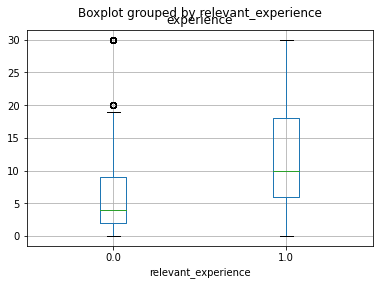

In [ ]:
boxplot = df.boxplot(column=['experience'], by='relevant_experience')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


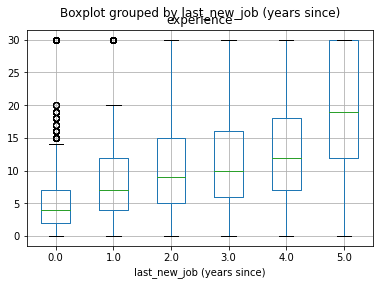

In [ ]:
boxplot = df.boxplot(column=['experience'], by='last_new_job (years since)')

In [ ]:
groups = df.groupby('turnover').groups
groups

{0: [1, 2, 4, 6, 9, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 27, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 49, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 66, 67, 68, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, ...], 1: [0, 3, 5, 7, 8, 10, 18, 19, 26, 28, 29, 37, 42, 44, 45, 46, 47, 48, 50, 58, 59, 65, 69, 71, 92, 93, 98, 99, 100, 107, 112, 116, 121, 129, 137, 140, 147, 151, 155, 157, 164, 169, 180, 186, 188, 192, 200, 204, 205, 207, 210, 225, 232, 239, 252, 253, 258, 259, 260, 267, 270, 280, 281, 290, 301, 303, 306, 307, 311, 312, 321, 332, 336, 345, 348, 357, 359, 362, 368, 370, 372, 375, 379, 382, 391, 398, 406, 408, 413, 415, 422, 429, 436, 439, 445, 447, 452, 456, 464, 465, ...]}

In [ ]:
cdis = df['cdi']

turnover = cdis[groups[1]]
no_turnover = cdis[groups[0]]

turnover


0        0.920
3        0.789
5        0.764
7        0.762
8        0.920
         ...  
19421    0.920
19422    0.802
19423    0.855
19424    0.624
19425    0.920
Name: cdi, Length: 5045, dtype: float64

In [ ]:
no_turnover

1        0.776
2        0.624
4        0.767
6        0.920
9        0.920
         ...  
19151    0.689
19152    0.920
19155    0.920
19156    0.802
19157    0.855
Name: cdi, Length: 14381, dtype: float64

In [ ]:
df['citycode'] = df['citycode'].map(lambda x: x.lstrip('city_'))

In [ ]:
df

,candidateID,citycode,cdi,gender,relevant_experience,enrollment,qualification,specialization,experience,company_size,company_type,last_new_job (years since),training_hours,turnover
0,8949,103,0.920,Male,1.0,no_enrollment,Graduate,STEM,30.0,NaN,NaN,1,36.0,1
1,29725,40,0.776,Male,0.0,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47.0,0
2,11561,21,0.624,NaN,0.0,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83.0,0
3,33241,115,0.789,NaN,0.0,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52.0,1
4,666,162,0.767,Male,1.0,no_enrollment,Masters,STEM,30.0,50-99,Funded Startup,4,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,7323,103,0.920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19422,6512,65,0.802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19423,1799,67,0.855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
19424,7763,21,0.624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
unique_city_codes = df['citycode'].unique()

unique_city_codes

array(['103', '40', '21', '115', '162', '176', '160', '46', '61', '114',
       '13', '159', '102', '67', '100', '16', '71', '104', '64', '101',
       '83', '105', '73', '75', '41', '11', '93', '90', '36', '20', '57',
       '152', '19', '65', '74', '173', '136', '98', '97', '50', '138',
       '82', '157', '89', '150', '70', '175', '94', '28', '59', '165',
       '145', '142', '26', '12', '37', '43', '116', '23', '99', '149',
       '10', '45', '80', '128', '158', '123', '7', '72', '106', '143',
       '78', '109', '24', '134', '48', '144', '91', '146', '133', '126',
       '118', '9', '167', '27', '84', '54', '39', '79', '76', '77', '81',
       '131', '44', '117', '155', '33', '141', '127', '62', '53', '25',
       '2', '69', '120', '111', '30', '1', '140', '179', '55', '14', '42',
       '107', '18', '139', '180', '166', '121', '129', '8', '31', '171'],
      dtype=object)

In [ ]:
df["citycode"] = df['citycode'].astype('int')

pearson_correlation=df.corr()
pearson_correlation

,candidateID,citycode,cdi,relevant_experience,experience,training_hours,turnover
candidateID,1.000000,-0.011432,-0.037796,-0.043359,-0.030374,0.000998,0.019166
citycode,-0.011432,1.000000,0.413470,-0.012156,0.132561,-0.005665,-0.139516
cdi,-0.037796,0.413470,1.000000,0.059808,0.320113,0.001920,-0.335283
relevant_experience,-0.043359,-0.012156,0.059808,1.000000,0.298177,0.011566,-0.128430
experience,-0.030374,0.132561,0.320113,0.298177,1.000000,-0.001182,-0.161355
training_hours,0.000998,-0.005665,0.001920,0.011566,-0.001182,1.000000,-0.021577
turnover,0.019166,-0.139516,-0.335283,-0.128430,-0.161355,-0.021577,1.000000


In [ ]:
df['citycode'].nunique()

123

In [ ]:
df['cdi'].nunique()

93

In [ ]:
groups = df.groupby('citycode').groups
groups

cdis = df['cdi']

city_103 = cdis[groups[40]]

city_103[1]

0.776

In [ ]:
df_cdi_experience = df.loc[:,['cdi', 'experience']]
df_cdi_experience

,cdi,experience
0,0.920,30.0
1,0.776,15.0
2,0.624,5.0
3,0.789,0.0
4,0.767,30.0
...,...,...
19421,0.920,NaN
19422,0.802,NaN
19423,0.855,NaN
19424,0.624,NaN


In [ ]:
df_cdi_experience.isnull().sum()

cdi             0
experience    333
dtype: int64

In [ ]:
train = df_cdi_experience.dropna() 
train.isnull().sum()

cdi           0
experience    0
dtype: int64

In [ ]:
df_cdi_experience

,cdi,experience
0,0.920,30.0
1,0.776,15.0
2,0.624,5.0
3,0.789,0.0
4,0.767,30.0
...,...,...
19421,0.920,NaN
19422,0.802,NaN
19423,0.855,NaN
19424,0.624,NaN


In [ ]:
train

,cdi,experience
0,0.920,30.0
1,0.776,15.0
2,0.624,5.0
3,0.789,0.0
4,0.767,30.0
...,...,...
19153,0.878,14.0
19154,0.920,14.0
19155,0.920,30.0
19156,0.802,0.0


In [ ]:
#test = pd.concat([df_cdi_experience,train]).drop_duplicates(keep=False)

#test=df_cdi_experience[df_cdi_experience.isin(train)]


#test = df_cdi_experience[df_cdi_experience.apply(lambda x: x.values.tolist() not in train.values.tolist())]

test = df_cdi_experience.merge(train, on='experience', how='left', indicator=True)


test = test[test['_merge'] == 'left_only']

test.isnull().sum()

cdi_x           0
experience    333
cdi_y         333
_merge          0
dtype: int64

In [ ]:
test = test.drop(columns=['cdi_y','_merge'])

test = test.rename(columns={"cdi_x":"cdi"})

test

,cdi,experience
184754,0.920,NaN
555199,0.698,NaN
2167987,0.698,NaN
3759495,0.920,NaN
3951727,0.920,NaN
...,...,...
25823905,0.920,NaN
25823906,0.802,NaN
25823907,0.855,NaN
25823908,0.624,NaN


In [ ]:
test.shape

(333, 4)

In [ ]:
from sklearn.linear_model import LinearRegression

train_x = train['cdi'].head(15293).to_numpy().reshape(-1, 1)
train_y = train['experience'].head(15293).to_numpy().reshape(-1, 1)

test_x = train['cdi'].tail(3800).to_numpy().reshape(-1, 1)
test_y = train['experience'].tail(3800).to_numpy().reshape(-1, 1)

test_x

array([[0.939],
       [0.878],
       [0.789],
       ...,
       [0.92 ],
       [0.802],
       [0.855]])

In [ ]:
train_x

array([[0.92 ],
       [0.776],
       [0.624],
       ...,
       [0.624],
       [0.762],
       [0.92 ]])

In [ ]:
train_y

array([[30.],
       [15.],
       [ 5.],
       ...,
       [ 7.],
       [ 5.],
       [30.]])

In [ ]:
reg = LinearRegression().fit(train_x, train_y)
pred = reg.predict(test_x)


In [ ]:
from sklearn import metrics 

print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((pred - test_y)**2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(test_x,test_y))

Coefficients: 
 [[24.64937098]]
Mean squared error: 83.20
Variance score: 0.10
